In [6]:
import numpy as np
import pandas as pd

## 1

Перечисли имена клиентов, которым должны одобрить заявку на кредит, исходя из следующих условий:
- возрас больше 18 лет
- доход выше 10_000 в месяц

In [7]:
df = pd.read_csv('../datasets/credit_scoring.csv')
filtered_df = df[(df['Возраст'] > 18) & (df['Месячный доход'] > 10000)]

# Вывод имен клиентов
filtered_df['Имя']

1    Ольга
4     Петр
Name: Имя, dtype: object

## 2

Загружаем датасет [классификации ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset).
Отрисуй диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка"

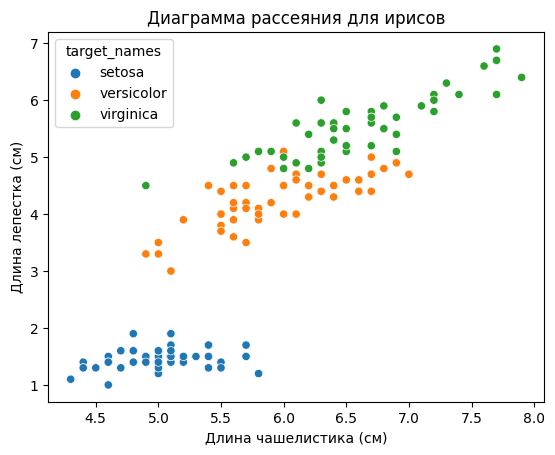

In [8]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета Iris
iris = load_iris()
data = iris.data # Переменная будет содержать значения параметров чашелистика
target = iris.target # Переменная будет содержать метки классов для каждого экземпляра ириса
target_names = iris.target_names # Переменная будет содержать названия классов, соответствующие меткам классов
feature_names = iris.feature_names # Переменная будет содержать названия параметров, соответствующие столбцам данных

# Создание объекта DataFrame с использованием данных data 
# и названиями параметров feature_names. Каждый столбец DataFrame будет соответствовать одному параметру.
df = pd.DataFrame(data, columns = feature_names)
# Добавление столбца 'target'содержащего метки классов для каждого экземпляра ириса
df['target'] = target 
# Добавление столбцасодержащего названия классов, соответствующие меткам классов. 
# Каждое название класса выбирается на основе соответствующей метки класса из массива target_names.
df['target_names'] = [target_names[i] for i in target]

sns.scatterplot(data = df, x='sepal length (cm)', y='petal length (cm)', hue='target_names')

# Настройка осей и заголовка диаграммы
plt.xlabel('Длина чашелистика (см)') # sepal length (cm)
plt.ylabel('Длина лепестка (см)') # petal length (cm)
plt.title('Диаграмма рассеяния для ирисов') 

# Отображение диаграммы рассеяния
plt.show()

## 3

Решаем задачу классификации ирисов с помощью дерева решений:
- Делим датасет на обучающую и тестовую выборки с параметрами `test_size=0.2`, `random_state=42`
- Используя только признаки "Длина чашелистика" и "Длина лепестка", обучаем дерево решений с глубиной дерева 2
- Считаем точность (accuracy) классификации

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

selected_features = ['sepal length (cm)', 'petal length (cm)']
X = df[selected_features]
y = target

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение дерева решений
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = tree.predict(X_test)

# Вычисление точности классификации
accuracy = accuracy_score(y_test, y_pred)

# Вывод точности с округлением до 3 знаков после запятой
print(f"Точность классификации: {accuracy:.3f}")

Точность классификации: 0.967


## 4

- Строим [разделяющую поверхность](code-samples/surface.py) по признакам "Длина чашелистика" и "Длина лепестка". 
- Оотрисовываем дерево, которое получилось в результате обучения модели. 
- Выводим количество листов у получившегося дерева.

d:\PYTHON\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\PYTHON\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\PYTHON\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


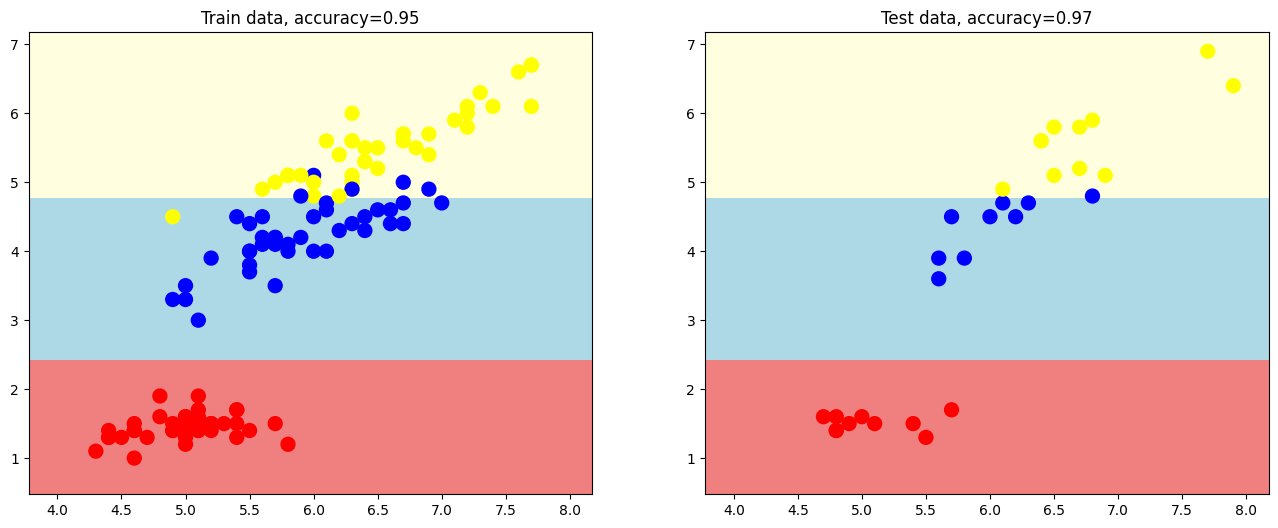

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

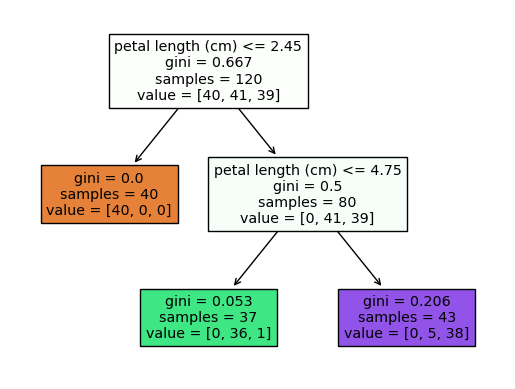

In [10]:
from sklearn.tree import plot_tree
import sys
# Добавление пути к родительской папке в список путей поиска модулей
sys.path.append('../code-samples')
# Импорт файла из другой папки
from surface import get_meshgrid, plot_decision_surface

get_meshgrid(X.values)

# Построение разделяющей поверхности и дерева решений
plot_decision_surface(tree, X_train, y_train, X_test, y_test)
plt.show()

# X.columns.tolist() возвращает список имен столбцов X

# Опция filled=True позволяет заполнить узлы дерева цветом в зависимости от среднего значения целевой переменной в узле.
feature_names = X.columns.tolist()
plot_tree(tree, feature_names = feature_names, filled=True)

In [11]:
# Свойство tree_ объекта модели дерева решений предоставляет доступ к атрибутам и структуре самого дерева. 
# n_leaves - это атрибут структуры дерева, который возвращает количество листьев в дереве. 
print("Количество листьев в дереве:", tree.tree_.n_leaves) 

Количество листьев в дереве: 3


## 5

- Генерируем синусоидный сигнал с шумами размером 250
- Делим датасет на обучающую и тестовую выборки с параметрами `test_size=0.2`, `random_state=42`
- Обучаем дерево решений для предсказания синусоидального сигнала c глубиной дерева 1
- Строим график истинных ответов и предсказаний модели

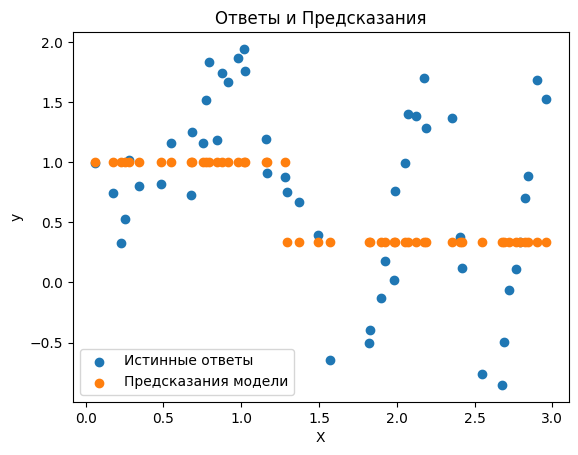

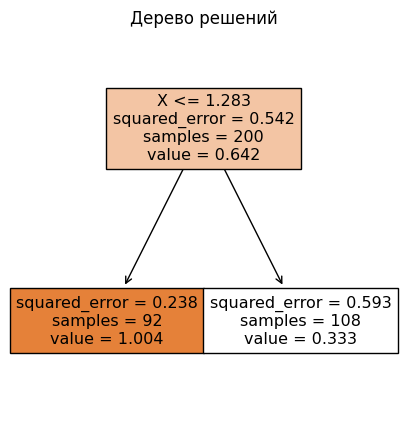

In [12]:
from sklearn.tree import DecisionTreeRegressor
from dataset import generate_sin
from sklearn.tree import plot_tree

X, y = generate_sin(sample_size = 250)

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение дерева решений для регрессии

tree2 = DecisionTreeRegressor(max_depth = 1)
tree2.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = tree2.predict(X_test)

# Построение графика истинных ответов и предсказаний модели
plt.scatter(X_test, y_test, label='Истинные ответы')
plt.scatter(X_test, y_pred, label='Предсказания модели')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ответы и Предсказания')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))

# Здесь мы передаем объект tree2, который является обученной моделью 
# Опция feature_names=['X'] указывает на имя признака, используемого в дереве решений
# Опция filled=True позволяет заполнить узлы дерева цветом в зависимости от среднего значения целевой переменной в узле.
plot_tree(tree2, feature_names=['X'], filled=True)

plt.title('Дерево решений')
plt.show()

## 6

- Строим график зависимости среднеквадратичной ошибки (MSE) предсказания на тестовой выборке от глубины дерева
(от 1 до 30).
- Пишнм глубину дерева, при которой качество модели наилучшее.

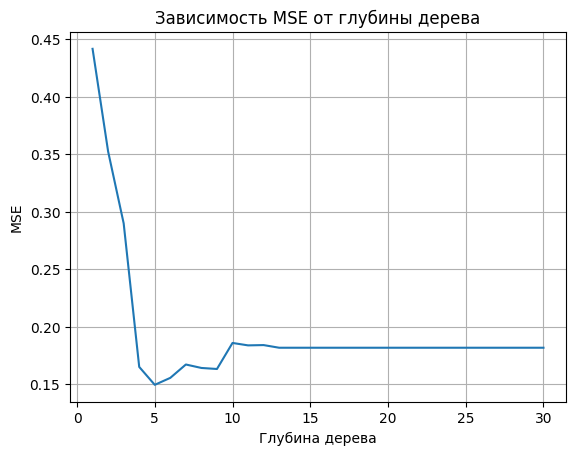

Наилучшая глубина дерева: 5
Наименьшее значение MSE: 0.1495


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

mse_scores = []  # Список для хранения значений MSE

# Цикл для перебора разных глубин дерева от 1 до 30
for i in range(1, 31):
    # Создание экземпляра регрессора DecisionTreeRegressor с текущей глубиной
    tree = DecisionTreeRegressor(max_depth=i)
    
    # Обучение модели на обучающей выборке
    tree.fit(X_train, y_train)
    
    # Предсказание на тестовой выборке
    y_pred = tree.predict(X_test)
    
    # Вычисление среднеквадратичной ошибки (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Добавление значения MSE в список
    mse_scores.append(mse)

# Построение графика зависимости MSE от глубины дерева
plt.plot(range(1, 31), mse_scores)
plt.xlabel('Глубина дерева')
plt.ylabel('MSE')
plt.title('Зависимость MSE от глубины дерева')
plt.grid(True)
plt.show()

# Определение наилучшей глубины дерева и наименьшего значения MSE


# Возвращает индекс наименьшего значения в списке
best_depth = np.argmin(mse_scores)+1   # Наилучшая глубина дерева


best_mse = round(min(mse_scores), 4)  # Наименьшее значение MSE с округлением до 4 знаков после запятой

# Вывод результатов
print("Наилучшая глубина дерева:", best_depth)   
print("Наименьшее значение MSE:", best_mse)

## 7

- Обучаем большее количество деревьев
- Рассчитываем среднеквадратичную ошибку (MSE) предсказания на тестовой выборке.
- Строим график зависимости MSE 
- Выводим количество деревьев, при котором качество модели наилучшее. 

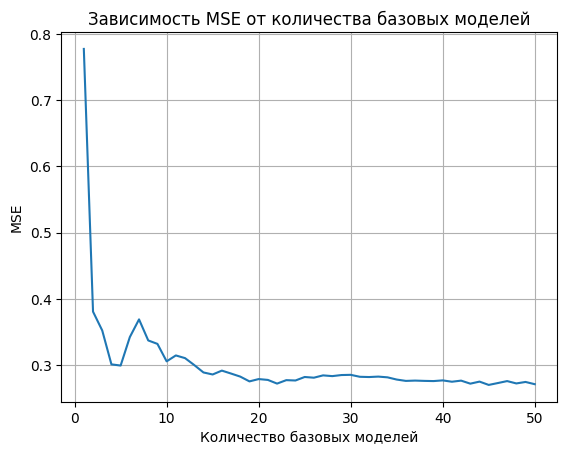

Наилучшее количество деревьев: 45


In [14]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse_scores = []

# Цикл для изменения количества базовых моделей (n_estimators)
for n_estimators in range(1, 51):
    # Создание BaggingRegressor с базовой моделью DecisionTreeRegressor
    # max_depth=5 - ограничение глубины каждого дерева внутри BaggingRegressor
    # bootstrap=True - применение подвыборки с возвращением при обучении каждой базовой модели
    # random_state=42 - задание начального состояния для воспроизводимости
    # max_samples указывает, какую долю обучающих данных следует использовать для каждой базовой модели
    bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5),
                                         n_estimators=n_estimators,
                                         bootstrap=True,
                                         max_samples=7,
                                         random_state=42)
    
    # Приведение целевых переменных y_train и y_test к одномерному массиву
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    # Обучение модели на обучающих данных
    bagging_regressor.fit(X_train, y_train)
    
    # Предсказание значений на тестовых данных
    y_pred = bagging_regressor.predict(X_test)
    
    # Рассчет среднеквадратичной ошибки (MSE) и добавление ее в список
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Построение графика зависимости MSE от количества базовых моделей
plt.plot(range(1, 51), mse_scores)
plt.xlabel('Количество базовых моделей')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества базовых моделей')
plt.grid(True)
plt.show()

# Определение наилучшего количества деревьев (base_estimators)
best_estimators = mse_scores.index(min(mse_scores)) + 1
print("Наилучшее количество деревьев:", best_estimators)


## 8

- Обучаем алгоритм случайного леса с параметрами `max_depth=5,n_estimators=100, max_features=1, random_state=42`.
- Считаем MSE на тестовой выборке.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Создание и обучение модели случайного леса
# max_depth=5 - ограничение глубины каждого дерева в случайном лесу
# n_estimators=100 - количество деревьев в случайном лесу
# max_features=1 - количество признаков, используемых для разделения узлов (здесь указано 1, что означает использование только одного случайно выбранного признака)
# random_state=42 - задание начального состояния для воспроизводимости
random_forest = RandomForestRegressor(max_depth=5, n_estimators=100, max_features=1, random_state=42)

# модель обучается на обучающих данных 
random_forest.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = random_forest.predict(X_test)

# Расчет MSE и округление до 3 знаков после запятой
mse = mean_squared_error(y_test, y_pred)
mse_rounded = round(mse, 3)

print("MSE на тестовой выборке:", mse_rounded)

MSE на тестовой выборке: 0.123
